## STEP 3: Preprocessing the dataset 🔧

* Checking the distribution of 'Sale Price'.

* Log Transformation of the Dependant Variable

* Detect outliers

* Clean Outliers

In [21]:
print(train.keys())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### **Overview of the Target Variable**

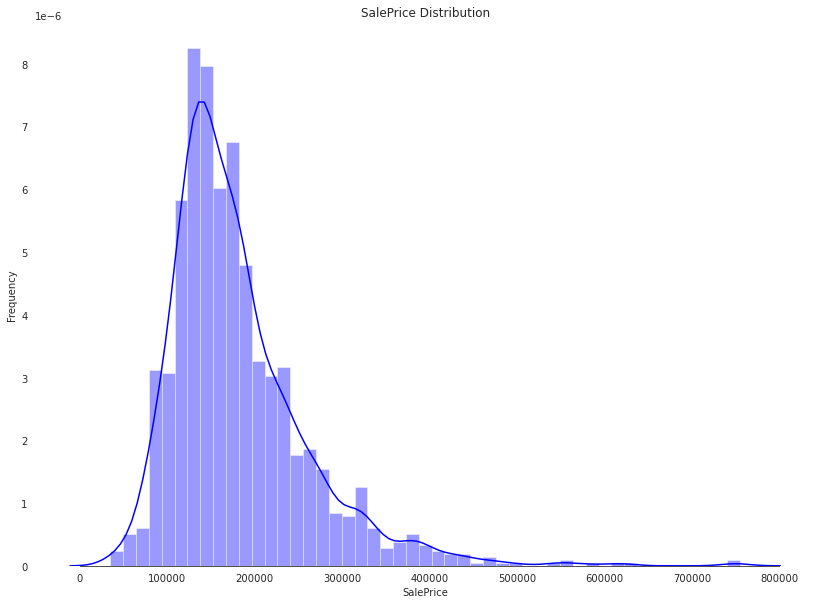

In [22]:
sns.set_style("white")
sns.set_color_codes(palette="deep")
f,ax = plt.subplots(figsize=(14,10))

sns.distplot(train['SalePrice'], color="Blue" )
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution" )
sns.despine(trim=True, left=True)
plt.show()



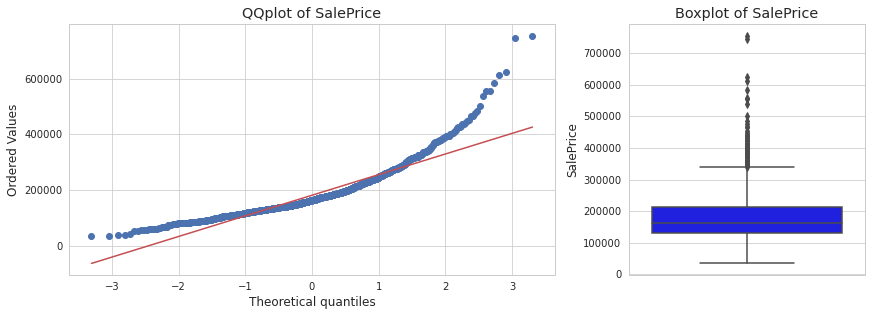

In [91]:
fig = plt.figure(constrained_layout=True, figsize=(12,8))
grid = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)
sns.set_color_codes(palette="deep")

# QQplot

ax2 = fig.add_subplot(grid[2:,:2])
stats.probplot(train['SalePrice'],plot=ax2)
ax2.set_title("QQplot of SalePrice")

 # Boxplot
    
ax3 = fig.add_subplot(grid[2:,2])
sns.boxplot(train['SalePrice'],ax=ax3,orient="v",color="Blue")
ax3.set_title("Boxplot of SalePrice")
plt.show()

###  **Skewness and the kurtosis**

- **Skewness**

![](https://i.pinimg.com/originals/c1/01/b0/c101b0da6ea1a0dab31f80d9963b0368.png)

. Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution.

. symmetrical distribution must have a skewness of 0.

. Skewness can be positive or negative.

. Positive Skewness when The mean and median will be greater than the mode.

. Negative Skewness The mean and median will be less than the mode.

- **Kurtosis**

![](https://i.pinimg.com/564x/e1/f0/b2/e1f0b20eb0773915fc6e9b91909adfa3.jpg)

. Kurtosis is the measure of outliers present in the distribution.

. There are three types of Kurtosis: Mesokurtic, Leptokurtic, and Platykurtic.

. Mesokurtic distribution indicates an excess kurtosis of zero. This means that the data has a normal distribution.

. Leptokurtic shows a positive excess kurtosis, so Leptokurtic distribution indicates heavy tails that's means the existance of large outliers .

. A Platykurtic distribution shows a negative excess kurtosis.

* **Calcul the skewness and the kurtosis**

In [92]:
print("Skewness : %f" % train['SalePrice'].skew() )
print("Kurtosis : %f" % train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


- The skewness value is 1, that means that the data are moderately skewed, and the high Kurtosis indicates that the data

  has heavy tails or outliers, so we need to investigate!

* We notice in the graph above that the variable target is right skewed, the best way to fix it is to perform a log transformation of the same data.

### **Log Transformation of the Dependant Variable(SalePrice)** 

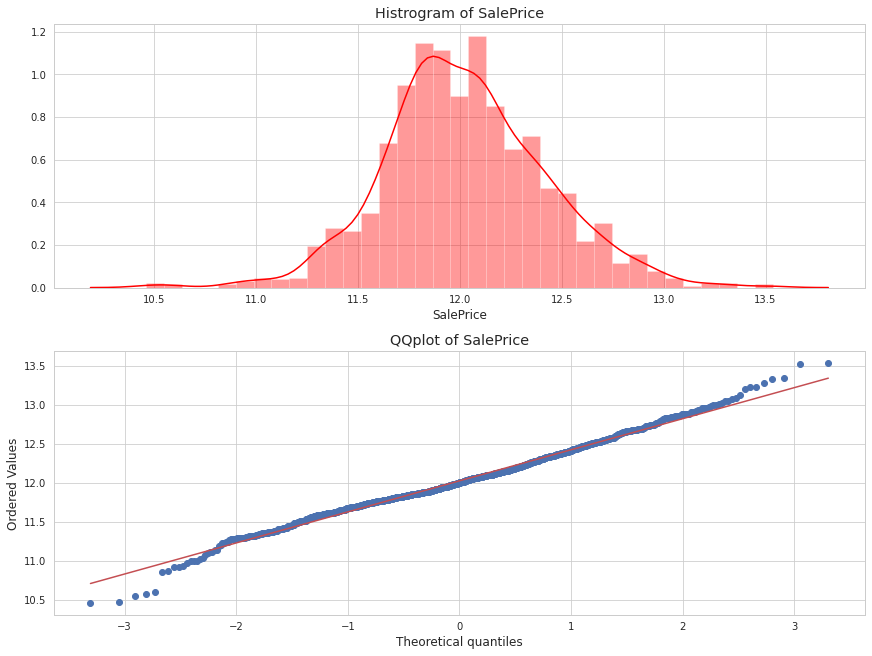

In [93]:
# In this case, We use the numpy fuction log1p which  applies log(1+x) to all elements of the column.

train['SalePrice'] = np.log1p(train['SalePrice'])
sns.set_color_codes(palette="deep")

## Visualize of SalePrice after the normalization
fig,(ax1,ax2) = plt.subplots(2,1,constrained_layout=True,figsize=(12,9))

 # Histrogram
sns.distplot(train['SalePrice'],ax=ax1, color= "red")
ax1.set_title("Histrogram of SalePrice")
 # QQplot
stats.probplot(train['SalePrice'],plot=ax2)
ax2.set_title("QQplot of SalePrice")

plt.show()

- So now the skewed seems corrected, and the data is normally distributed.

### **Discover outliers with visualization tools**

* **Before performing statistical analyses,we should identify potential outliers. According to this article [Tha author Dean De Cock ](www.amstat.org/publications/jse/v19n3/decock.pdf), there are outliers for the GR LIVE AREA, so we will visualize this feature graphically with the BoxPlot and ScatterPlot.**

A.**Box Plot**

In [94]:
trace0 = go.Box(
    name = "GrLivArea",
    y = train["GrLivArea"]
)

trace1 = go.Box(
    name = "MasVnrArea",
    y = train["MasVnrArea"]
)

trace2 = go.Box(
    name = "KitchenAbvGr",
    y = train["KitchenAbvGr"]
)

trace3 = go.Box(
    name = "BedroomAbvGr",
    y = train["BedroomAbvGr"] 
)

trace4 = go.Box(
    name = "LotFrontage",
    y = train["LotFrontage"]
)

trace5 = go.Box(
    name = "GarageCars",
    y = train["GarageCars"]
)
data = [trace0, trace1, trace2, trace3, trace4,trace5  ]
plotly.offline.iplot(data)

* **B. Scatter Plot**

In [95]:
fig = px.scatter(train, x='GrLivArea' , y='SalePrice')
fig.show()

* **As we see, there are some points which are far from the population in the top right corner.**

In [96]:
train.iloc[np.where(train.GrLivArea > 4000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534474
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521141
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982935


### **Clean Outliers**

* **The presence of outliers in the dataset may affect our analysis and they can cause problems in statistical procedures. so we need to remove them.**

In [97]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,inplace=True)

* #### **After Removing Outliers**

In [98]:
fig = px.scatter(train, x='GrLivArea' , y='SalePrice')
fig.show()